In [89]:
import sys
import struct
import ctypes
import pandas as pd
import numpy as np
import plotly.express as plx
import matplotlib.pyplot as plt
def read_img(src, dst=None):
    fin = open(src, 'rb')
    (w, h) = struct.unpack('hi', fin.read(8))
#     print(w, h) 
    buff = ctypes.create_string_buffer(4 * w * h)
    fin.readinto(buff)
    fin.close()
    pixels = []
    classes = []
#     img = Image.new('RGB', (w, h))
#     pix = img.load()
    offset = 0
#     for j in xrange(h):
#         for i in xrange(w):
    for i in range(h*w):
        r, g, b, c = list(map(ord, struct.unpack_from('cccc', buff, offset)))
        pixels.append([r, g, b])
        classes.append(c)
#         pix[i, j] = (ord(r), ord(g), ord(b))
        offset += 4
#     if dst:
#         img.save(dst)
#     else:
#         img.show()
    pixels = np.array(pixels).reshape((h, w, 3))
    classes = np.array(classes).reshape((h, w))
    return pixels, classes

In [ ]:
! ls

In [12]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [112]:
def show(filename, k=11):
    px, c = read_img(filename)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax2.set_title(filename)
    ax1.imshow(px)
    ax2.imshow(c, cmap=plt.get_cmap('jet', k))

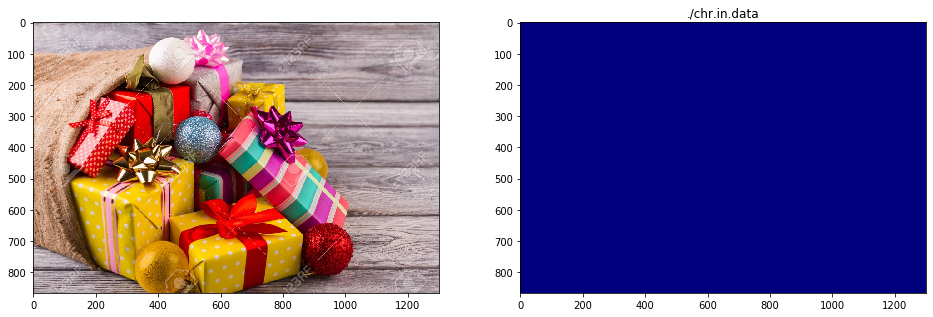

In [113]:
show('./chr.in.data')

In [99]:
iters = ! ls _*.data

In [100]:
len(iters)

66

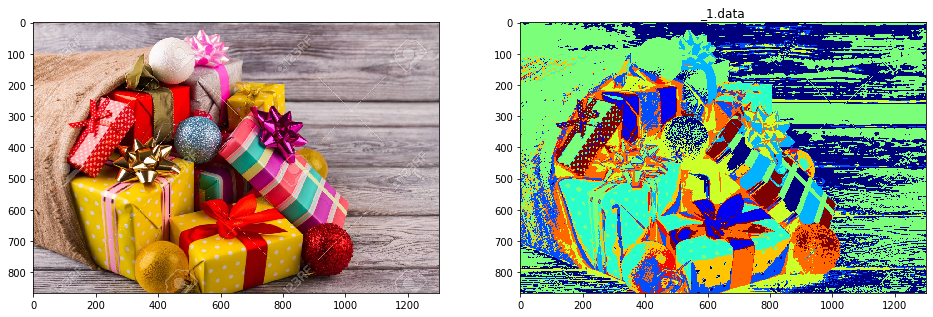

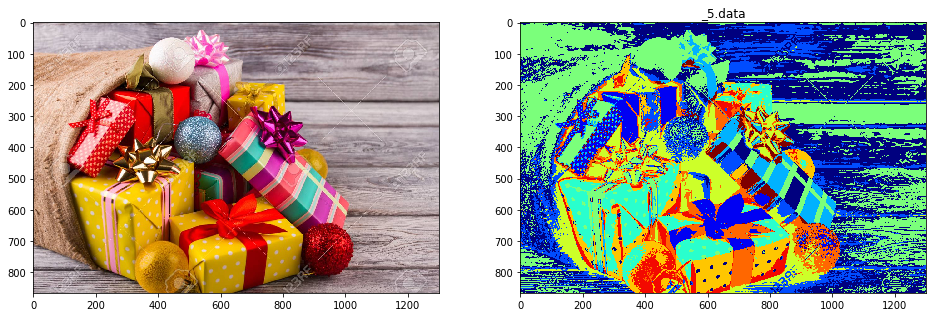

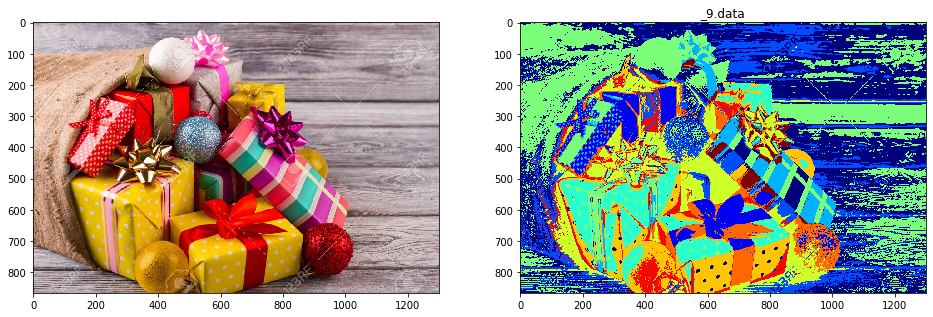

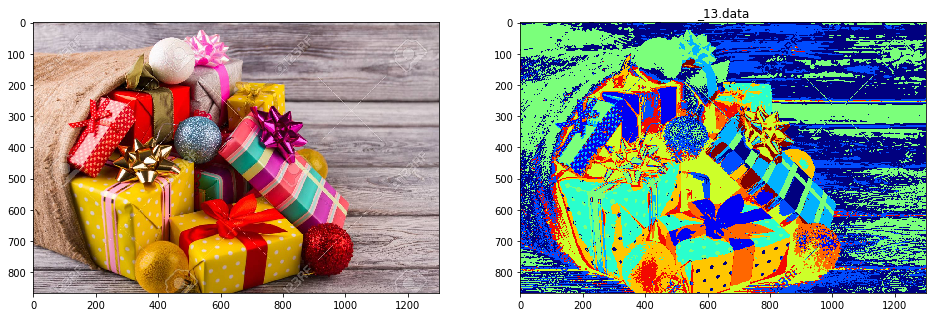

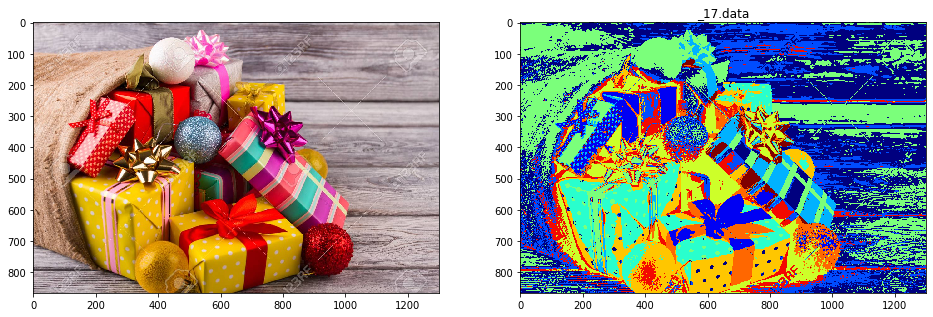

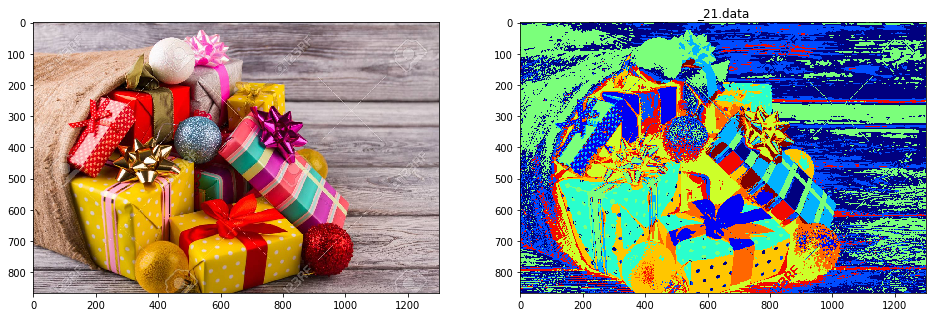

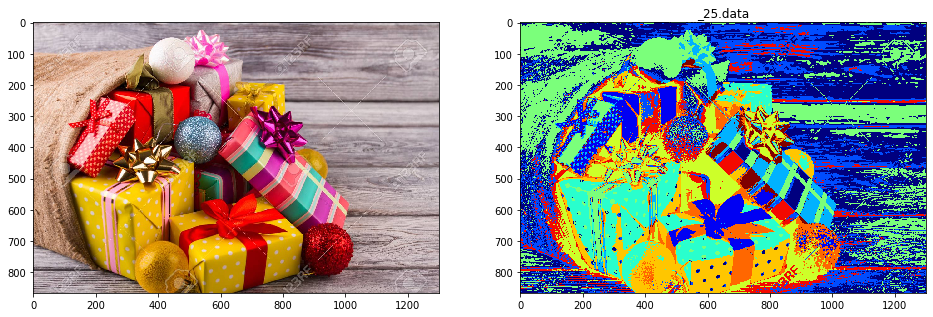

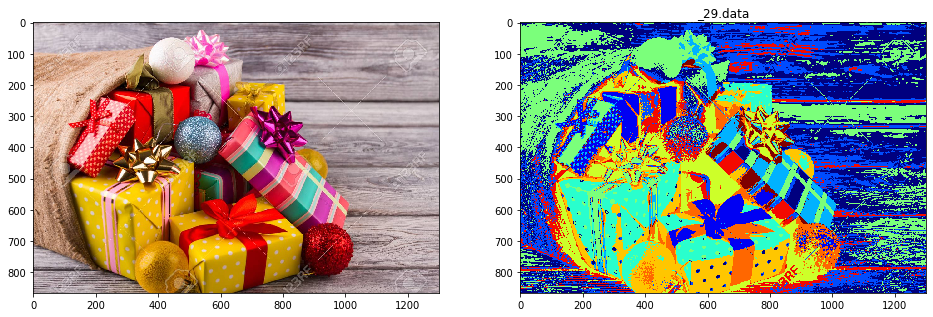

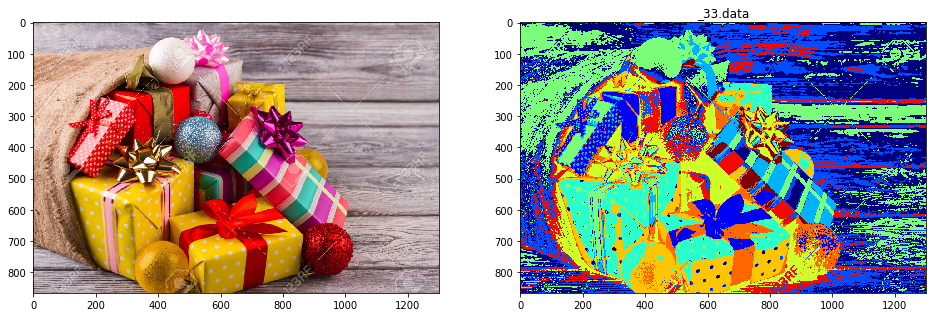

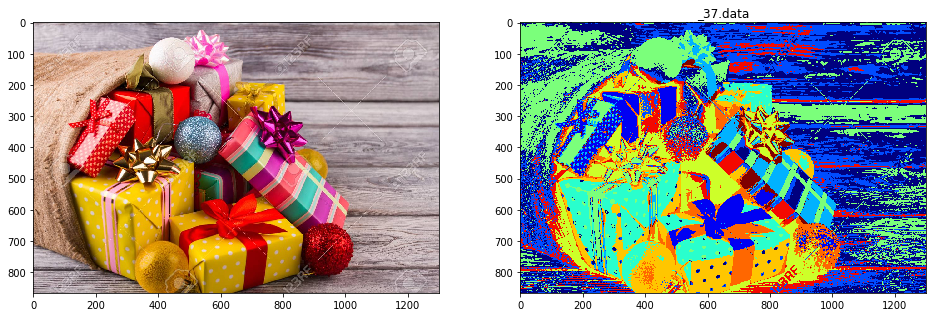

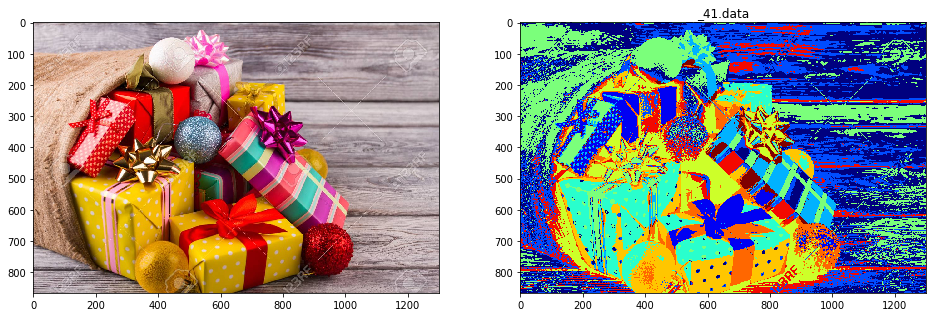

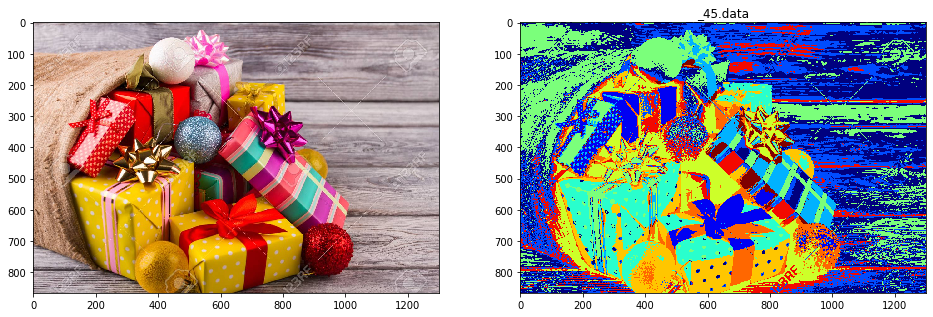

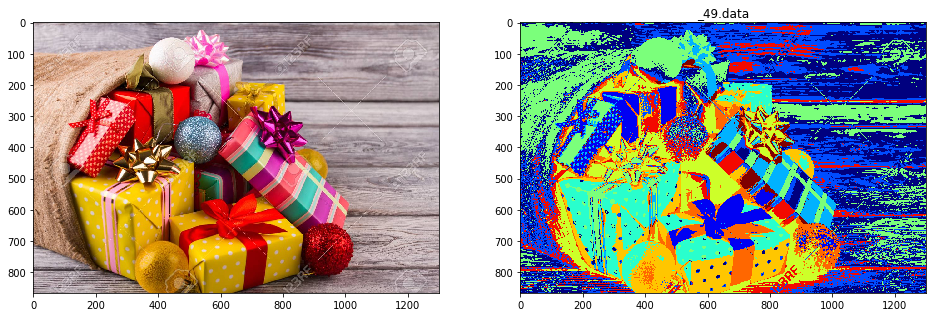

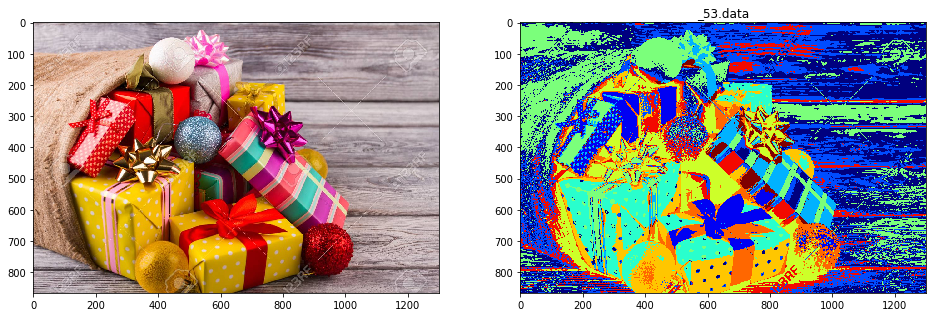

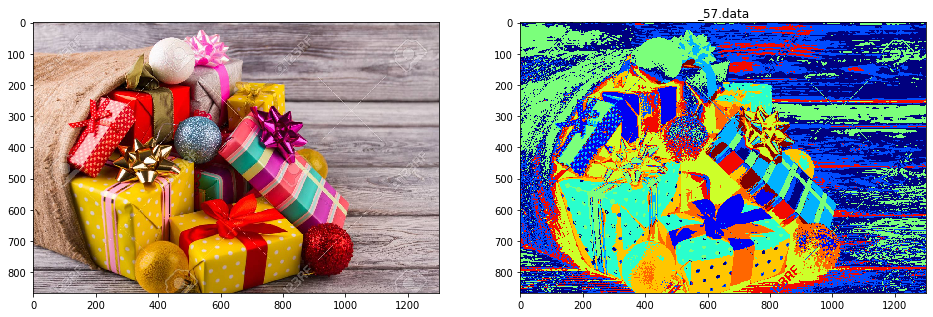

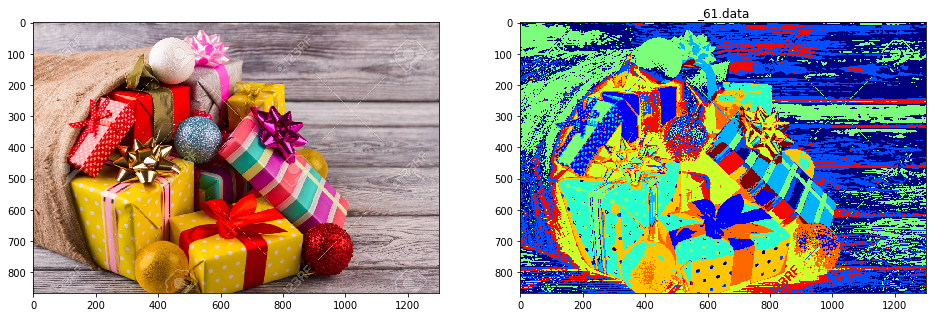

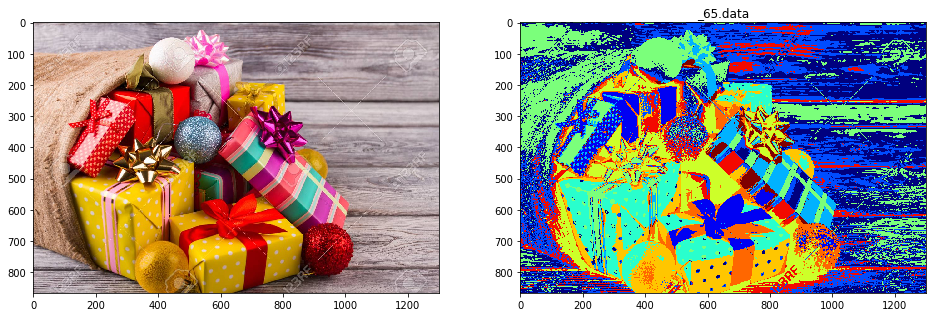

In [114]:
for i in range(1, 66, 4):
    show('_'+str(i)+'.data')

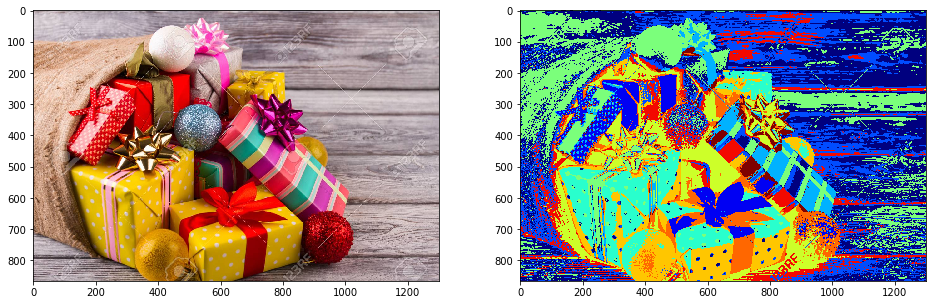

In [98]:
show('./_res')

In [115]:
1300 * 866

1125800

In [117]:
np.array([[1, 2], [3, 4]]).tolist()

[[1, 2], [3, 4]]

In [119]:
np.zeros(4)

array([0., 0., 0., 0.])

In [122]:
a = np.arange(12).reshape((3, 4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [124]:
b = np.zeros((3, 4))
b

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [126]:
b[1,:] = a[1,:]

In [127]:
b

array([[0., 0., 0., 0.],
       [4., 5., 6., 7.],
       [0., 0., 0., 0.]])

In [130]:
a = np.zeros((3, 3))
a += np.diag([1, 2, 3], k=0)
a += np.diag([4, 5], k=-1)
a += np.diag([7, 8], k=1)
a.tolist()

[[1.0, 7.0, 0.0], [4.0, 2.0, 8.0], [0.0, 5.0, 3.0]]

In [65]:
plot3d(px)

In [23]:
def load_data(filename):
    px = read_img(filename)
    px = pd.DataFrame(px, columns='r g b c'.split())
    px['c'] = px['c'].astype('category')
    return px

def plot3d(px):
    fig = plx.scatter_3d(px, x='r', y='g', z='b', color='c')
    fig.update_traces(marker=dict(size=3),
                      selector=dict(mode='markers'))
    fig.show()

In [67]:
for it in iters:
    px = load_data(it)
    plot3d(px)

In [ ]:
px = read_img('./_2.data')
px = pd.DataFrame(px, columns='r g b c'.split())
px['c'] = px['c'].astype('category')
fig = plx.scatter_3d(px, x='r', y='g', z='b', color='c')
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
px = read_img('./_3.data')
px = pd.DataFrame(px, columns='r g b c'.split())
px['c'] = px['c'].astype('category')
fig = plx.scatter_3d(px, x='r', y='g', z='b', color='c')
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
px = read_img('./_4.data')
px = pd.DataFrame(px, columns='r g b c'.split())
px['c'] = px['c'].astype('category')
fig = plx.scatter_3d(px, x='r', y='g', z='b', color='c')
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
px = read_img('./_5.data')
px = pd.DataFrame(px, columns='r g b c'.split())
px['c'] = px['c'].astype('category')
fig = plx.scatter_3d(px, x='r', y='g', z='b', color='c')
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=px['r'], y=px['g'], z=px['b'],# color='c',
    mode='markers',
    marker=dict(
        size=2,
#         showscale=True,
        color=px['c'],                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), showlegend=True)
# fig.legend()
fig.show()